In [1]:

# Imports

import pandas as pd
import spacy
import matplotlib.pyplot as plt
import nltk

import tensorflow as tf
import numpy as np
import seaborn as sns

## Import Modeling Package
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from tensorflow.keras.models import Sequential



from sklearn.naive_bayes import MultinomialNB
# Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
import sys
sys.path.append('Desktop/belt-exam-aml-option-A')
import exam_functions as fn

In [10]:
# Increase column width
pd.set_option('display.max_colwidth', 250)

In [11]:
df = pd.read_csv('Desktop/belt-exam-aml-option-A/data/part1-aml-belt-exam.csv')
df.head()

,author,text
0,Poe,additional information either on Monday or in the course of the
1,Poe,teeth. Not a speck on their surface—not a shade on their
2,Dickens,"“Harry? As soon as he had seen your friend here, safe in a coach with"
3,Poe,thought—to make sure that my vision had not deceived me—to calm
4,Poe,the flowers. No guile disguised the fervor of love which animated


In [13]:
nlp_lite = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp_lite

In [16]:
df['tokens']= fn.batch_preprocess_texts(df['text'],nlp=nlp_lite, remove_stopwords = True, remove_punct =True, use_lemmas = False,)

3551it [00:24, 144.60it/s]


In [18]:
df['lemmas']= fn.batch_preprocess_texts(df['text'],nlp=nlp_lite, remove_stopwords = True, remove_punct =True, use_lemmas = True,)

3551it [00:23, 150.66it/s]


In [19]:
df.head()

,author,text,tokens,lemmas
0,Poe,additional information either on Monday or in the course of the,"[additional, information, monday, course]","[additional, information, monday, course]"
1,Poe,teeth. Not a speck on their surface—not a shade on their,"[teeth, speck, surface, shade]","[tooth, speck, surface, shade]"
2,Dickens,"“Harry? As soon as he had seen your friend here, safe in a coach with","[harry, soon, seen, friend, safe, coach]","[harry, soon, see, friend, safe, coach]"
3,Poe,thought—to make sure that my vision had not deceived me—to calm,"[thought, sure, vision, deceived, calm]","[think, sure, vision, deceive, calm]"
4,Poe,the flowers. No guile disguised the fervor of love which animated,"[flowers, guile, disguised, fervor, love, animated]","[flower, guile, disguise, fervor, love, animate]"


In [20]:
df['joined_tokens'] = df['tokens'].map(lambda x: " ".join(x))

In [21]:
df['joined_tokens']

0               additional information monday course
1                          teeth speck surface shade
2                  harry soon seen friend safe coach
3                  thought sure vision deceived calm
4       flowers guile disguised fervor love animated
                            ...                     
3546     condition shadow doubt appertaining present
3547                left vanities turbulent triumphs
3548         soul intense painful meditation roaming
3549           scenes past resolved amend new sphere
3550         distinctness looked counsel mute appeal
Name: joined_tokens, Length: 3551, dtype: object

In [22]:
df['joined_lemmas'] = df['lemmas'].map(lambda x: " ".join(x))

In [23]:

df['joined_lemmas']

0            additional information monday course
1                       tooth speck surface shade
2                harry soon see friend safe coach
3                  think sure vision deceive calm
4       flower guile disguise fervor love animate
                          ...                    
3546     condition shadow doubt appertain present
3547               leave vanity turbulent triumph
3548         soul intense painful meditation roam
3549          scene past resolve amend new sphere
3550        distinctness look counsel mute appeal
Name: joined_lemmas, Length: 3551, dtype: object

In [25]:
df['author'].value_counts()

Poe        2075
Dickens    1476
Name: author, dtype: int64

In [26]:
grp_Poe = df.loc[df['author'] == 'Poe']

In [27]:
grp_Poe

,author,text,tokens,lemmas,joined_tokens,joined_lemmas
0,Poe,additional information either on Monday or in the course of the,"[additional, information, monday, course]","[additional, information, monday, course]",additional information monday course,additional information monday course
1,Poe,teeth. Not a speck on their surface—not a shade on their,"[teeth, speck, surface, shade]","[tooth, speck, surface, shade]",teeth speck surface shade,tooth speck surface shade
3,Poe,thought—to make sure that my vision had not deceived me—to calm,"[thought, sure, vision, deceived, calm]","[think, sure, vision, deceive, calm]",thought sure vision deceived calm,think sure vision deceive calm
4,Poe,the flowers. No guile disguised the fervor of love which animated,"[flowers, guile, disguised, fervor, love, animated]","[flower, guile, disguise, fervor, love, animate]",flowers guile disguised fervor love animated,flower guile disguise fervor love animate
5,Poe,came and went!—and the victim—where is she? I knew her not—or,"[came, went!—and, victim, knew]","[come, went!—and, victim, know]",came went!—and victim knew,come went!—and victim know
...,...,...,...,...,...,...
3543,Poe,"Fronting him, sixthly and lastly, was situated a singularly","[fronting, sixthly, lastly, situated, singularly]","[front, sixthly, lastly, situate, singularly]",fronting sixthly lastly situated singularly,front sixthly lastly situate singularly
3545,Poe,of the sound; and then his tones grew thrillingly distinct as he,"[sound, tones, grew, thrillingly, distinct]","[sound, tone, grow, thrillingly, distinct]",sound tones grew thrillingly distinct,sound tone grow thrillingly distinct
3546,Poe,"condition of shadow and doubt, appertaining to the present, and","[condition, shadow, doubt, appertaining, present]","[condition, shadow, doubt, appertain, present]",condition shadow doubt appertaining present,condition shadow doubt appertain present
3547,Poe,I left it for ever for the vanities and the turbulent triumphs of,"[left, vanities, turbulent, triumphs]","[leave, vanity, turbulent, triumph]",left vanities turbulent triumphs,leave vanity turbulent triumph


In [28]:

grp_Poe_text = " ".join(grp_Poe['text'])
print(grp_Poe_text[:500],"\n")

      additional information either on Monday or in the course of the       teeth. Not a speck on their surface—not a shade on their       thought—to make sure that my vision had not deceived me—to calm       the flowers. No guile disguised the fervor of love which animated       came and went!—and the victim—where is she? I knew her not—or       was not visited upon me. And once—but once again in the silence       Yet let me not be misapprehended. The undue, earnest, and morbid       lofty, as  



In [30]:

grp_Dickens = df.loc[df['author'] == 'Dickens']
grp_Dickens_text = " ".join(grp_Dickens['text'])
print(grp_Dickens_text[:500],"\n")

“Harry? As soon as he had seen your friend here, safe in a coach with Perfect stillness ensued—not a rustle—not a breath—Guilty. birth and parentage. Those proofs were destroyed by you, and now, in collect his thoughts. After awhile, he began to remember a few Roused into new strength and energy, and stimulated by the noise within these dogs?” asked Monks, looking from one to the other of the men who disgrace on no one living, except you who use it. Let that pass. He was The knocking came again. 



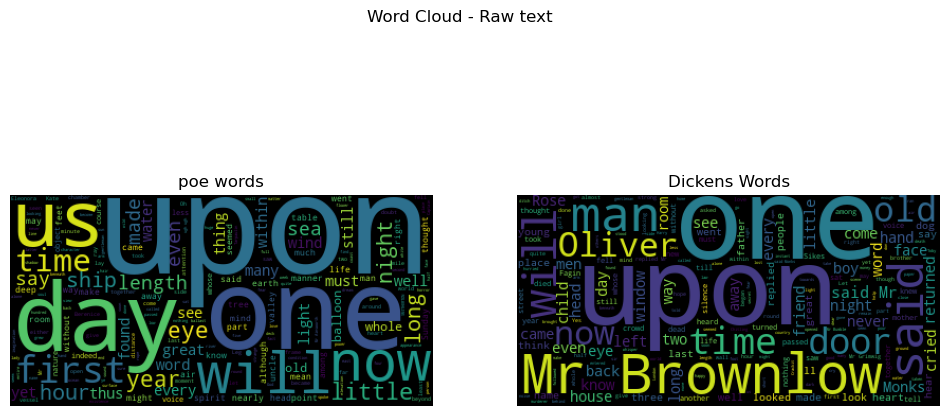

In [31]:
# Create a word clouds of above texts

from wordcloud import WordCloud, STOPWORDS
Poe_cloud = WordCloud(min_word_length=2).generate(grp_Poe_text)
Dickens_cloud = WordCloud(min_word_length=2).generate(grp_Dickens_text)

## Plot the Images

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
axes[0].imshow(Poe_cloud)
axes[0].set_title('poe words')
axes[0].axis('off')

axes[1].imshow(Dickens_cloud)
axes[1].set_title('Dickens Words')
axes[1].axis('off');
fig.suptitle('Word Cloud - Raw text');

In [34]:


grp_Poe_text = " ".join(grp_Poe['joined_lemmas'])
print(grp_Poe_text[:500],"\n")


grp_Dickens_text = " ".join(grp_Dickens['joined_lemmas'])
print(grp_Dickens_text[:500],"\n")

additional information monday course tooth speck surface shade think sure vision deceive calm flower guile disguise fervor love animate come went!—and victim know visit silence let misapprehend undue earnest morbid lofty appearance bonnet crown flesh 18 earth uphold cow blue color have horn gallon black strap have imbibe prosperity mental life hold light turn northward sun arise sickly yellow lustre replete horror horror horrible vague ship grow bulk like live body thing reason bear resemblance  

harry soon see friend safe coach perfect stillness ensue rustle breath guilty birth parentage proof destroy collect thought awhile begin remember rouse new strength energy stimulate noise dog ask monks look man disgrace live use let pass knocking come knock like hand head half brother illegitimate son centre crowd street corner swear old officer know grow love clothe teach send quiet country place grief mingle cup bitter tear wot come young bate demand kags bald name boy grey listen room smal

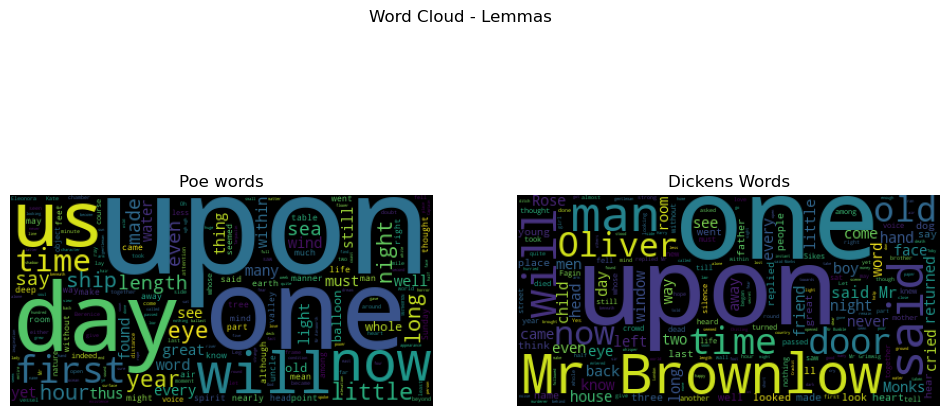

In [36]:
# Create a word clouds of above texts

from wordcloud import WordCloud, STOPWORDS
ConanDoyle_cloud = WordCloud(min_word_length=2).generate(grp_Poe_text)
Christie_cloud = WordCloud(min_word_length=2).generate(grp_Dickens_text)

## Plot the Images

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
axes[0].imshow(Poe_cloud)
axes[0].set_title('Poe words')
axes[0].axis('off')

axes[1].imshow(Dickens_cloud)
axes[1].set_title('Dickens Words')
axes[1].axis('off')
fig.suptitle('Word Cloud - Lemmas');

In [38]:
grp_Poe_tokens = grp_Poe['tokens'].explode().astype(str).to_list()

In [39]:
grp_Dickens_tokens = grp_Dickens['tokens'].explode().astype(str).to_list()


In [40]:
grp_Poe


,author,text,tokens,lemmas,joined_tokens,joined_lemmas
0,Poe,additional information either on Monday or in the course of the,"[additional, information, monday, course]","[additional, information, monday, course]",additional information monday course,additional information monday course
1,Poe,teeth. Not a speck on their surface—not a shade on their,"[teeth, speck, surface, shade]","[tooth, speck, surface, shade]",teeth speck surface shade,tooth speck surface shade
3,Poe,thought—to make sure that my vision had not deceived me—to calm,"[thought, sure, vision, deceived, calm]","[think, sure, vision, deceive, calm]",thought sure vision deceived calm,think sure vision deceive calm
4,Poe,the flowers. No guile disguised the fervor of love which animated,"[flowers, guile, disguised, fervor, love, animated]","[flower, guile, disguise, fervor, love, animate]",flowers guile disguised fervor love animated,flower guile disguise fervor love animate
5,Poe,came and went!—and the victim—where is she? I knew her not—or,"[came, went!—and, victim, knew]","[come, went!—and, victim, know]",came went!—and victim knew,come went!—and victim know
...,...,...,...,...,...,...
3543,Poe,"Fronting him, sixthly and lastly, was situated a singularly","[fronting, sixthly, lastly, situated, singularly]","[front, sixthly, lastly, situate, singularly]",fronting sixthly lastly situated singularly,front sixthly lastly situate singularly
3545,Poe,of the sound; and then his tones grew thrillingly distinct as he,"[sound, tones, grew, thrillingly, distinct]","[sound, tone, grow, thrillingly, distinct]",sound tones grew thrillingly distinct,sound tone grow thrillingly distinct
3546,Poe,"condition of shadow and doubt, appertaining to the present, and","[condition, shadow, doubt, appertaining, present]","[condition, shadow, doubt, appertain, present]",condition shadow doubt appertaining present,condition shadow doubt appertain present
3547,Poe,I left it for ever for the vanities and the turbulent triumphs of,"[left, vanities, turbulent, triumphs]","[leave, vanity, turbulent, triumph]",left vanities turbulent triumphs,leave vanity turbulent triumph


In [41]:
# using custom function get_ngram_measures_finder to get the bigrams

bigram_grp_Poe = fn.get_ngram_measures_finder(grp_Poe_tokens,top_n=20)

bigram_grp_Dickens = fn.get_ngram_measures_finder(grp_Dickens_tokens,top_n=20)

In [42]:
bigram_grp_Poe,bigram_grp_Dickens

(                  Words  Raw Freq
 0      (mr., ainsworth)  0.000939
 1     (thousand, miles)  0.000835
 2         (guide, rope)  0.000730
 3     (valley, colored)  0.000730
 4      (colored, grass)  0.000626
 5      (captain, pratt)  0.000522
 6          (dubble, l.)  0.000522
 7          (king, pest)  0.000522
 8             (l., dee)  0.000522
 9     (mr., rumgudgeon)  0.000522
 10       (25,000, feet)  0.000417
 11     (doctor, dubble)  0.000417
 12             (ha, ha)  0.000417
 13       (mr., osborne)  0.000417
 14     (studding, sail)  0.000417
 15  (uncle, rumgudgeon)  0.000417
 16  (yesterday, sunday)  0.000417
 17        (1000, years)  0.000313
 18           (20, 1000)  0.000313
 19          (ana, pest)  0.000313,
                Words  Raw Freq
 0    (mr., brownlow)  0.008480
 1        (said, mr.)  0.004924
 2     (mr., grimwig)  0.001915
 3     (replied, mr.)  0.001778
 4      (mr., bumble)  0.001231
 5      (said, monks)  0.001094
 6     (mrs., maylie)  0.000957
 7   (ol

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author         3551 non-null   object
 1   text           3551 non-null   object
 2   tokens         3551 non-null   object
 3   lemmas         3551 non-null   object
 4   joined_tokens  3551 non-null   object
 5   joined_lemmas  3551 non-null   object
dtypes: object(6)
memory usage: 166.6+ KB


In [44]:
# define X and y

X = df['text']
y = df['author']

In [45]:
y.value_counts()


Poe        2075
Dickens    1476
Name: author, dtype: int64

In [51]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=321)

In [52]:
# Modeling

# using raw text (paragraph) , creating pipeline with count vectorizer and classification model

## Create a model pipeline for inference.
nb_clf = MultinomialNB()

nb_pipe = Pipeline([('countvectorizer', CountVectorizer()), 
                       ('nb_classifier', nb_clf)])


In [53]:
nb_pipe.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('nb_classifier', MultinomialNB())])

In [54]:
 # Fit and transform on the training data
X_train_transformed = nb_pipe.named_steps['countvectorizer'].fit_transform(X_train)

 # Transform the testing data
 X_test_transformed = nb_pipe.named_steps['countvectorizer'].transform(X_test)

# # Now you can use X_train_transformed and X_test_transformed in your machine learning model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

     Dickens       0.94      0.97      0.96      1132
         Poe       0.98      0.95      0.97      1531

    accuracy                           0.96      2663
   macro avg       0.96      0.96      0.96      2663
weighted avg       0.96      0.96      0.96      2663



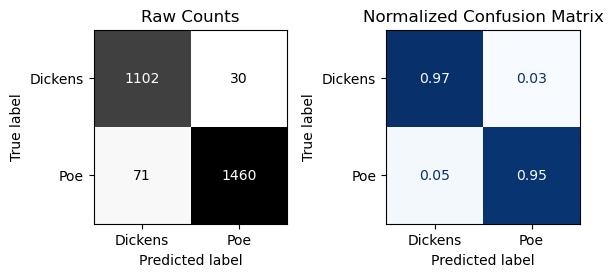


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

     Dickens       0.78      0.85      0.82       344
         Poe       0.90      0.85      0.88       544

    accuracy                           0.85       888
   macro avg       0.84      0.85      0.85       888
weighted avg       0.85      0.85      0.85       888



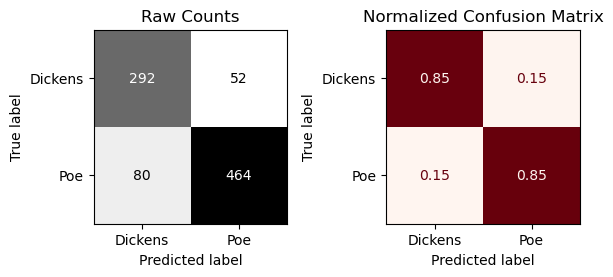

In [55]:
# using custom classification evaluation function to evaluate

fn.evaluate_classification(nb_pipe, X_train, y_train, X_test, y_test)

In [59]:
import os
import joblib

# Define the directory path and the full file path
directory_path = os.path.join(os.path.expanduser("~"), "Desktop", "Models")
fpath_model = os.path.join(directory_path, "nb_classifierexam.joblib")

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Save the model
joblib.dump(nb_pipe, fpath_model)

['C:\\Users\\asus\\Desktop\\Models\\nb_classifierexam.joblib']

Text Classification - Deep NLP
Prepare tensorflow datasets for a train/val/test split
No need to balance classes
Note: Make sure your target is encoded numerically (integers).
Use a batch size of 32.
Select a sequence length appropriate for the dataset's text.
Add a column to the dataframe that has the length of each paragraph
Use the maximum length as the sequence length
Note: if your computer is having memory/PC issues when fitting the model, reduce the sequence length and add a comment listing the maximum length and why you had to reduce it)

In [60]:
# Make sure your target is encoded numerically (integers)
# Use labelencoder to encode the target 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded 
# Use a batch size of 32
BATCH_SIZE =32

In [61]:
df['text']

0               additional information either on Monday or in the course of the
1                      teeth. Not a speck on their surface—not a shade on their
2         “Harry? As soon as he had seen your friend here, safe in a coach with
3               thought—to make sure that my vision had not deceived me—to calm
4             the flowers. No guile disguised the fervor of love which animated
                                         ...                                   
3546            condition of shadow and doubt, appertaining to the present, and
3547          I left it for ever for the vanities and the turbulent triumphs of
3548              soul, to the most intense and painful meditation—she, roaming
3549    upon the scenes of the past, resolved to amend it in some new sphere of
3550    distinctness, looked towards his counsel, in mute appeal that he would,
Name: text, Length: 3551, dtype: object

In [62]:
# Add a column to the dataframe that has the length of each paragraph

# Let's take a look at the length of the each text
# We will split on each space, and then get the length
df['sequence_length'] =df['text'].map( lambda x: len(x.split(" ")))
df.head()

,author,text,tokens,lemmas,joined_tokens,joined_lemmas,sequence_length
0,Poe,additional information either on Monday or in the course of the,"[additional, information, monday, course]","[additional, information, monday, course]",additional information monday course,additional information monday course,17
1,Poe,teeth. Not a speck on their surface—not a shade on their,"[teeth, speck, surface, shade]","[tooth, speck, surface, shade]",teeth speck surface shade,tooth speck surface shade,17
2,Dickens,"“Harry? As soon as he had seen your friend here, safe in a coach with","[harry, soon, seen, friend, safe, coach]","[harry, soon, see, friend, safe, coach]",harry soon seen friend safe coach,harry soon see friend safe coach,15
3,Poe,thought—to make sure that my vision had not deceived me—to calm,"[thought, sure, vision, deceived, calm]","[think, sure, vision, deceive, calm]",thought sure vision deceived calm,think sure vision deceive calm,17
4,Poe,the flowers. No guile disguised the fervor of love which animated,"[flowers, guile, disguised, fervor, love, animated]","[flower, guile, disguise, fervor, love, animate]",flowers guile disguised fervor love animated,flower guile disguise fervor love animate,17


In [63]:
df['sequence_length'].describe()


count    3551.000000
mean       14.643199
std         3.129817
min         6.000000
25%        12.000000
50%        15.000000
75%        17.000000
max        22.000000
Name: sequence_length, dtype: float64

max range is 22 we will take 25 as maximum sequence length

In [64]:
SEQUENCE_LENGTH = 25


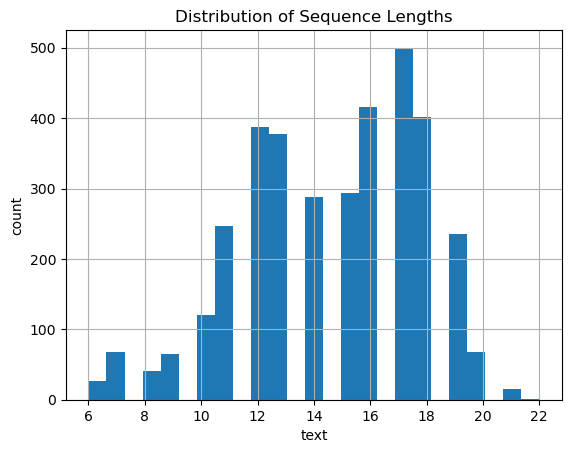

In [65]:
# Make histogram of sequence lengths
ax = df['sequence_length'].hist(bins = 'auto')
ax.set_xlabel('text')
ax.set_ylabel('count')
ax.set_title('Distribution of Sequence Lengths');

In [66]:
# prepare the dataset for modeling

print(X)

0               additional information either on Monday or in the course of the
1                      teeth. Not a speck on their surface—not a shade on their
2         “Harry? As soon as he had seen your friend here, safe in a coach with
3               thought—to make sure that my vision had not deceived me—to calm
4             the flowers. No guile disguised the fervor of love which animated
                                         ...                                   
3546            condition of shadow and doubt, appertaining to the present, and
3547          I left it for ever for the vanities and the turbulent triumphs of
3548              soul, to the most intense and painful meditation—she, roaming
3549    upon the scenes of the past, resolved to amend it in some new sphere of
3550    distinctness, looked towards his counsel, in mute appeal that he would,
Name: text, Length: 3551, dtype: object


In [67]:
print(y_encoded)


[1 1 0 ... 1 0 0]


In [68]:
classes = np.unique(y_encoded)
classes

array([0, 1])

In [69]:
# Convert to a dataset object using Dataset.from_tensor_slices()

ds = tf.data.Dataset.from_tensor_slices((X, y_encoded))

# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False) 

Train, test, split with a .7, .2, .1 ratio using the take, skip, approach

In [70]:
# Train, test, split with a .7, .2, .1 ratio using the take, skip, approach

# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )

# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)

import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)

print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")

    - train:	2485 samples 	(78 batches)
    - val:  	710 samples 	(23 batches)
    - test: 	356 samples 	(12 batches)


In [71]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)

# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)

# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)

In [72]:
# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')

 There are 78 training batches.
 There are 23 validation batches.
 There are 12 testing batches.


Build, fit, and evaluate a binary classification sequence model
Include a Keras TextVectorization as a layer in your model.
Use 100 as the embedding dimension/size
Use a bidirectional GRU

In [73]:
SEQUENCE_LENGTH = 25
# Create text Vectorization layer
text_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH
)

In [74]:
# Get just the text from ds_train
ds_texts = train_ds.map(lambda x, y_encoded: x)

# Preview the text
ds_texts.take(1).get_single_element()

<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'The broad sky seemed on fire. Rising into the air with showers of',
       b'glean nothing from their faces; they might as well have been of stone.',
       b'As the villain folded his arms tight together, and muttered curses on',
       b'      the trailing of the buoys materially impeded our progress, and we',
       b'fixed upon the floor; seeing this, he immediately resumed:',
       b'\xe2\x80\x9cEspecially, when the exclusive young man has got a friend stopping',
       b'born, and accidentally encountered by you, when your suspicions were',
       b'      paw, making strenuous efforts to accomplish the ditty.',
       b'      presence, sighing upon me in the evening winds, or filling the',
       b'      cryptogamous _fungus_ that emits an intense phosphorescence.',
       b'      MYSELF. (Hurriedly.) \xe2\x80\x9cCaptain Pratt, you must come and spend the',
       b'two or three months, he contented himself with hinting that

In [75]:
# Train (adapt on training text data))
text_vectorizer.adapt(ds_texts)
text_vectorizer.vocabulary_size()

5862

In [76]:
# Programmatically define size of vocab from vectorization layer
VOCAB_SIZE = text_vectorizer.vocabulary_size()
VOCAB_SIZE

5862

In [77]:
EMBED_DIM = 100
print(f'VOCAB_SIZE is {VOCAB_SIZE}')
print(f'SEQUENCE_LENGTH is {SEQUENCE_LENGTH}')
print(f'EMBED_DIM is {EMBED_DIM}')

VOCAB_SIZE is 5862
SEQUENCE_LENGTH is 25
EMBED_DIM is 100


In [78]:
# using custom functions

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers
def build_gru_model(text_vectorization_layer):
                
    gru_model = Sequential([
        text_vectorization_layer,
        tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, 
                                  output_dim=EMBED_DIM, 
                                  input_length=SEQUENCE_LENGTH)])
    # Add GRU layer *new*
    gru_model.add(layers.GRU(128, return_sequences = True))   
    gru_model.add(layers.GlobalMaxPooling1D())
    # Output layer
    gru_model.add(layers.Dense(len(classes), 
                              activation='softmax'))
        
    optimizer = optimizers.legacy.Adam()
    gru_model.compile(optimizer=optimizer,  
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    gru_model.summary()
    return gru_model


# Include callbacks
def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 25)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 25, 100)           586200    
                                                                 
 gru (GRU)                   (None, 25, 128)           88320     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 674,778
Trainable params: 674,778
Non-trai

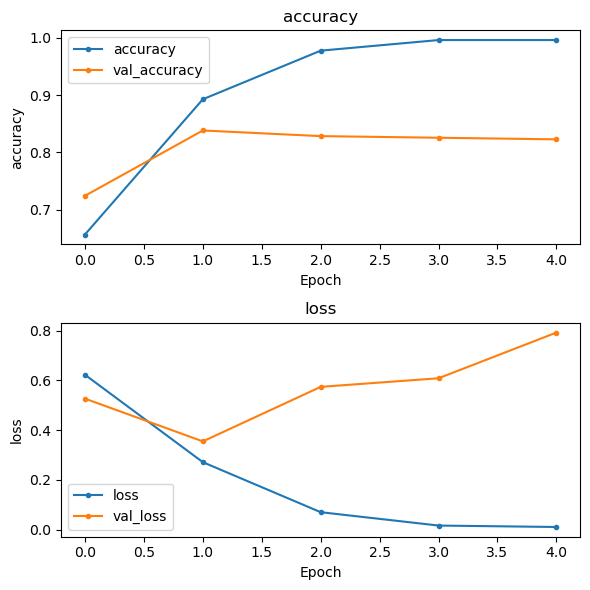


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1482

    accuracy                           1.00      2485
   macro avg       1.00      1.00      1.00      2485
weighted avg       1.00      1.00      1.00      2485



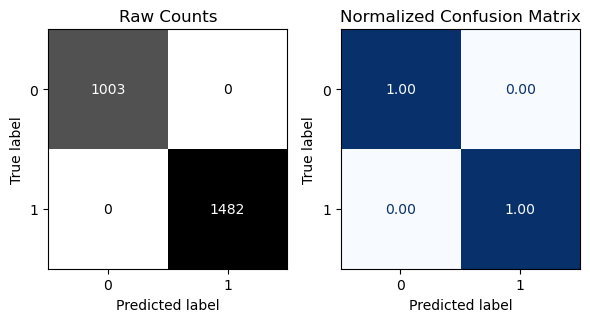


- Evaluating Training Data:
78/78 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 1.0000
{'loss': 0.001891308813355863, 'accuracy': 1.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       166
           1       0.81      0.84      0.82       190

    accuracy                           0.81       356
   macro avg       0.81      0.81      0.81       356
weighted avg       0.81      0.81      0.81       356



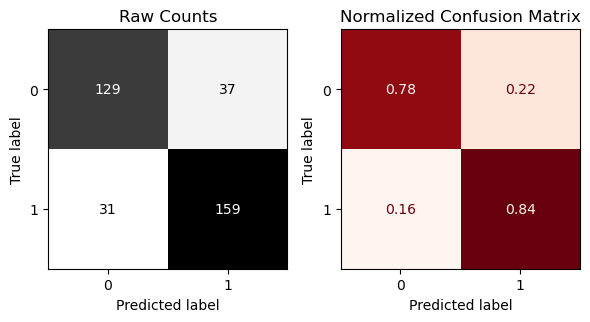


- Evaluating Test Data:
12/12 [==============================] - 0s 5ms/step - loss: 0.7680 - accuracy: 0.8090
{'loss': 0.767952561378479, 'accuracy': 0.8089887499809265}


In [79]:
# Build the gru model and specify the vectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers

gru_model = build_gru_model(text_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = gru_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

# Obtain the results
results = fn.evaluate_classification_network(
    gru_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

In [81]:
# Define the directory path on the desktop
directory_path = os.path.join(os.path.expanduser("~"), "Desktop", "Models")

# Define the full path to save the GRU model
fpath_model = os.path.join(directory_path, "gru")

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Save the model
gru_model.save(fpath_model, save_format='tf')



INFO:tensorflow:Assets written to: C:\Users\asus\Desktop\Models\gru\assets


INFO:tensorflow:Assets written to: C:\Users\asus\Desktop\Models\gru\assets
